In [10]:
import torch
from torch import nn

## 1、Softmax运算：将输出值变化为值为正且和为1的概率分布。用于离散值预测问题

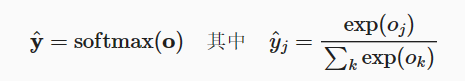

In [49]:
softmax = nn.Softmax()
input_tensor = torch.tensor([[-1.0,2.0,0.0],
                            [-2.0,1.0,2.0] ])
output_tensor = softmax(input_tensor)
output_tensor

C:\Users\64679\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


tensor([[0.0420, 0.8438, 0.1142],
        [0.0132, 0.2654, 0.7214]])

## 2、CrossEntropyLoss：交叉熵损失函数，只关心对正确类别的预测概率，因为只要其值足够大就可以确保分类正确

nn.CrossEntropyLoss(logits,label):<br>
<tab>logits: [batchsize , num_class]<br>
<tab>label: [batchsize] pyotch中会自动做one hot

In [27]:
criterion_CEL = nn.CrossEntropyLoss()

In [51]:
# 分类数目为4（0，1，2，3），batchzize为2时，模型logits的输出

# logits : 第一张图片模型预测为类别1；第二张图片模型预测为类别2
logits = torch.tensor([[-0.1,  0.4,  0.2,  0.1],    
                      [-0.2, -0.1, 0.1,  0.5]])

# label : 第一张图片模型标签为类别1；第二张图片标签为类别2
label = torch.tensor([1,0])

In [52]:
criterion(logits,label)

tensor(1.4258)

In [53]:
#cross entropy 具体实现方式
# step 1 ： logsoftmax
logsoftmax = nn.LogSoftmax()
logits_logsoftmax = logsoftmax(logits)
logits_logsoftmax

C:\Users\64679\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


tensor([[-1.6525, -1.1525, -1.3525, -1.4525],
        [-1.6991, -1.5991, -1.3991, -0.9991]])

In [54]:
nl = nn.NLLLoss() #把输出与Label对应的值拿出来，去掉负号，再求均值。
nl(logits_logsoftmax,label) # (1.1525+1.6991)/2 = 1.4258

tensor(1.4258)

## 3、判断模型的输出和真实值

In [69]:
logits = torch.tensor([[-0.1,  0.4,  0.2,  0.1],    
                      [-0.2, -0.1, 0.1,  0.5]])

label = torch.tensor([1,0])

判断模型预测只要判断logits中值最大的index，就是预测的类别<br>
用argmax函数

In [70]:
logits.argmax (dim=-1) == label

tensor([ True, False])

In [77]:
acc = (logits.argmax (dim=-1) == label).float ().mean ().item() #求准确率
acc

0.5